<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/02_Neural_Network_Classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Classification with Pytorch

## 1. Make classification Data and get it ready

In [159]:
import sklearn

In [160]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

# create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state =42)

In [161]:
len(X),len(y)

(1000, 1000)

In [162]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 ssamples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 ssamples of y:
 [1 1 1 1 0]


In [163]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


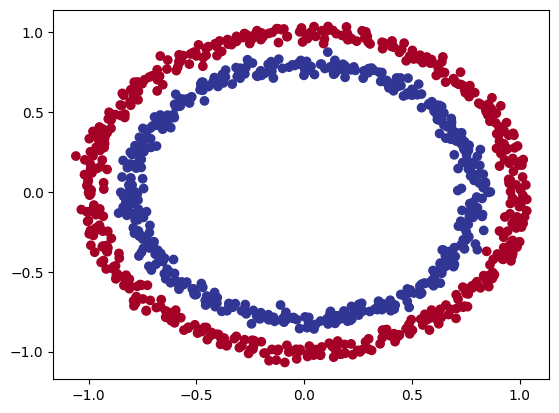

In [164]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x =X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset that is small enough to experiment but still sizable enough to pratice the fundamentals

###1.1 Check input and output shapes

In [165]:
X.shape,y.shape

((1000, 2), (1000,))

In [166]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [167]:
# view the first example of feauture and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:
Shapes for one sample of X: (2,) and the same for y: ()


# 1.2 Turn data into tensor and create train and test splits

In [168]:
import torch
torch.__version__

'2.8.0+cu126'

In [169]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [170]:
# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],  y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [171]:
# Split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size= 0.2,  # 0.2 = 20% of data will be test & 80% will be train
                                                     random_state=42)

In [172]:
len(X_train) , len(X_test),len(y_train), len(y_test)

(800, 200, 800, 200)

In [173]:
n_samples

1000

##2. Building a model

Lets build a model to classify our blue and red dots.

To do we want to:
1. Setup device agnostic code so code will run on an accelator(GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a traing and test loop



In [174]:
# Import Pytorch and nn
import torch
from torch import nn


# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [175]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, lets create a model that:

1. Subclasses `nn.module` (almost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes  of our data
3. Defnes a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [176]:
X_train.shape

torch.Size([800, 2])

In [177]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [178]:
#1. Construct a model that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.Linear

    self.layer_1 = nn.Linear(in_features=2,out_features=5)# takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)# takes in 5 features, produces 1 feature (y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

#4. Instantiate an instance of our model class and send it to the target ddevice
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [179]:
device

'cuda'

In [180]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [181]:
# Lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [182]:
#Make prediction
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [183]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{ len(untrained_preds)},shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}" )
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200,shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [184]:
y_test[:10],X_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

### 2.1 Setup loss function and optimizer

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) or mean squared error(MSE) loss.

for classification you might use binary cross entropy or classification cross entropy (cross entropy)

As a reminder a loss function is used to determine how wrong your model is.

And for optimizer, two of the most common are SGD and Adam, however Pytorch has many built-in options.

**For the loss functon we''re going to use `torch.nn.BCEWithLogitsLoss()`,for more on what binary cross entropy (BCE)

In [185]:
# setup the loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid  activation functin prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [186]:
# Calculate accuracy - out of 100 example eg, what percentage does our model get ri\ght ?
def acuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train Model

To train our model, we're going to need to build a  training loop:

1. forward pass

2. Calculate the loss

3. Optimizer zero grad

4. Loss backward(backpropagation)

5. Optimiaer step(gradient desecent)

### 3.1 Going from raw logits -. prediction prob -> pred labels

Our model outputs are going to be raw **logits**

We can conver these **logts** into **prediction probabilities** by passing them to some kind of activation function(e.g. sigmoid for binary classification and sofmax for multiclass classification)

Ten we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

In [187]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [188]:
# view the first 5 outputs  of the forward pass on the test data
model_0.eval()
with torch.no_grad():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [189]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [190]:
#Use the sigmoid activation function on our model logits  to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our pred prob values , we need to peform a range - style rounding on them:
* `y_pred_probs` >0.5, y=1 (class 1)
* `y_pred_probs` < ).5, y=0 (class 0)

In [191]:
# find the pred
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred  probs -> pred labels)
y_pred_labels =- torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# CHeck for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of  extra dimension
y_preds.squeeze()

tensor([ True,  True, False,  True, False], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [192]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 4.3 Training and Test loop

In [193]:
device

'cuda'

In [194]:
!nvidia-smi

Sat Oct  4 12:08:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P0             31W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [200]:
import torch
from torch import nn

# Calculate accuracy - out of 100 example eg, what percentage does our model get ri\ght ?
def acuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = acuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = acuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69331, Accuracy: 49.25% | Test loss: 0.69271, Test acc: 53.00%
Epoch: 10 | Loss: 0.69327, Accuracy: 49.75% | Test loss: 0.69279, Test acc: 54.00%
Epoch: 20 | Loss: 0.69324, Accuracy: 50.25% | Test loss: 0.69286, Test acc: 53.00%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.75% | Test loss: 0.69294, Test acc: 55.00%
Epoch: 40 | Loss: 0.69319, Accuracy: 50.62% | Test loss: 0.69301, Test acc: 54.00%
Epoch: 50 | Loss: 0.69317, Accuracy: 52.25% | Test loss: 0.69307, Test acc: 51.00%
Epoch: 60 | Loss: 0.69315, Accuracy: 51.38% | Test loss: 0.69314, Test acc: 56.00%
Epoch: 70 | Loss: 0.69314, Accuracy: 51.12% | Test loss: 0.69320, Test acc: 52.00%
Epoch: 80 | Loss: 0.69313, Accuracy: 51.25% | Test loss: 0.69325, Test acc: 48.50%
Epoch: 90 | Loss: 0.69311, Accuracy: 51.00% | Test loss: 0.69331, Test acc: 50.00%


##4. make prediction and  evaluate the model

From the metrices it lookn like our model isn't learning anythng...

So to inspect it lets make some predictions and make them visual!

In other words "Visualize"

To do so , we're going to import a function `https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py`

In [202]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

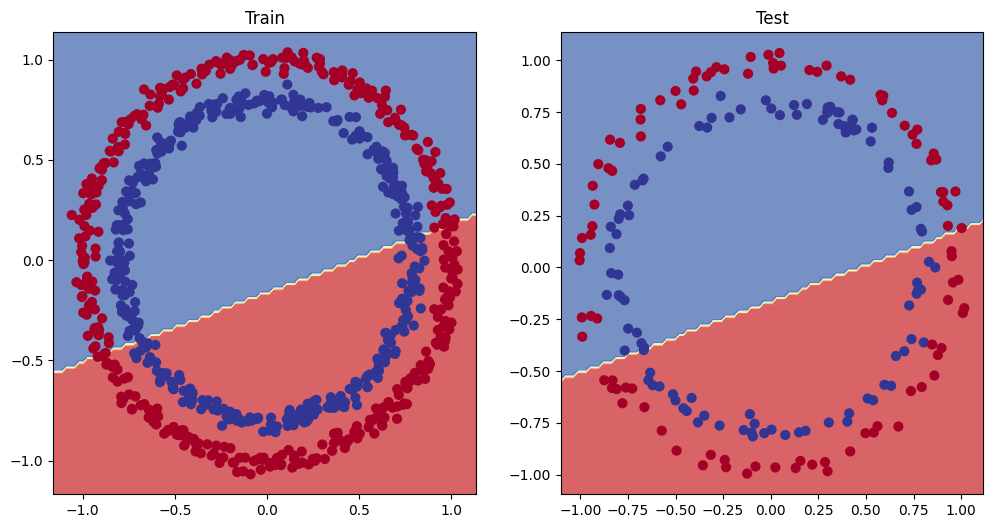

In [203]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [196]:
loss_fn

BCEWithLogitsLoss()

In [197]:
loss_fn_wihout_logits = nn.BCELoss()